In [1]:
%matplotlib inline
from scipy.integrate import odeint  
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#MODEL without basal transcription rates

def sdot_toggle(s,t,params):
    # parametres and variables
    M1,M2,P1, P2 = s
    kp1, kp2, kdp1, kdp2, K1, K2, n1, n2, km1, km2, kdm1, kdm2 = params
    
    # define rate ODEs
    rate_M1_production = km1 * ((K2**n2)/(P2**n2 + K2**n2)) 
    rate_M2_production = km2 * ((K1**n1)/(P1**n1 + K1**n1))
    rate_P1_production = kp1 * M1
    rate_P2_production = kp2 * M2
    rate_M1_loss = -kdm1*M1
    rate_M2_loss = -kdm2*M2
    rate_P1_loss = -kdp1*P1
    rate_P2_loss = -kdp2*P2
    dM1 = rate_M1_production + rate_M1_loss
    dM2 = rate_M2_production + rate_M2_loss
    dP1 = rate_P1_production + rate_P1_loss
    dP2 = rate_P2_production + rate_P2_loss
    dsdt = [dM1, dM2, dP1, dP2]
    return dsdt

# DEFINE INITIAL CONDITIONS AND PARAMETERS

M1=0.0
M2=0.0
P1=100
P2=1000

kp1= 0.9726
kp2= 1.170
kdp1 = 0.0165
kdp2 = 0.0165
K1 = 31.94
K2 = 30.0
n1 = 2.0
n2 = 2.0
km1= 8.3
km2= 2.06
kdm1 = 0.1386
kdm2 = 0.1386

s0=(M1,M2,P1,P2)
params = (kp1, kp2, kdp1, kdp2, K1, K2, n1, n2, km1, km2, kdm1, kdm2)

# time points
t_max=2000
t_obs=np.linspace(0,t_max,10000)

# Use the odeint function to simulate system
s_obs=odeint(sdot_toggle,s0,t_obs,args=(params,))

# print steady state values for mRNA and proteins
M1_obs=s_obs[:,0]
M2_obs=s_obs[:,1]
P1_obs=s_obs[:,2]
P2_obs=s_obs[:,3]


In [3]:
# MODEL including basal transcription rates

def sdot_toggle_basal(s,t,params):
    # parametres and variables
    M1, M2, P1, P2 = s
    kp1, kp2, kdp1, kdp2, K1, K2, n1, n2, km1, km2, kdm1, kdm2, kbm1, kbm2 = params
    
    # define rate ODEs
    rate_M1_production = km1 * ((K2**n2)/(P2**n2 + K2**n2)) + kbm1
    rate_M2_production = km2 * ((K1**n1)/(P1**n1 + K1**n1)) + kbm2
    rate_P1_production = kp1 * M1
    rate_P2_production = kp2 * M2
    rate_M1_loss = -kdm1*M1
    rate_M2_loss = -kdm2*M2
    rate_P1_loss = -kdp1*P1
    rate_P2_loss = -kdp2*P2
    dM1 = rate_M1_production + rate_M1_loss
    dM2 = rate_M2_production + rate_M2_loss
    dP1 = rate_P1_production + rate_P1_loss
    dP2 = rate_P2_production + rate_P2_loss
    dsdt = [dM1, dM2, dP1, dP2]
    return dsdt

# DEFINE INITIAL CONDITIONS AND PARAMETERS

M1=0.0
M2=0.0
P1=100
P2=1000

kp1= 0.9726
kp2= 1.170
kdp1 = 0.0165
kdp2 = 0.0165
K1 = 31.94
K2 = 30.0
n1 = 2.0
n2 = 2.0
km1= 8.3
km2= 2.06
kdm1 = 0.1386
kdm2 = 0.1386
kbm1 = 0.032
kbm2 = 0.119

s0=(M1,M2,P1,P2)
params = (kp1, kp2, kdp1, kdp2, K1, K2, n1, n2, km1, km2, kdm1, kdm2, kbm1, kbm2)

# time points
t_max=2000
t_obs=np.linspace(0,t_max,10000)

# Use the odeint function to simulate system
s_obs=odeint(sdot_toggle_basal,s0,t_obs,args=(params,))

# print steady state values for mRNA and proteins
M1_t_obs=s_obs[:,0]
M2_t_obs=s_obs[:,1]
P1_t_obs=s_obs[:,2]
P2_t_obs=s_obs[:,3]

#print(M1_t_obs[-1])
#print(M2_t_obs[-1])
#print(P1_t_obs[-1])
#print(P2_t_obs[-1])

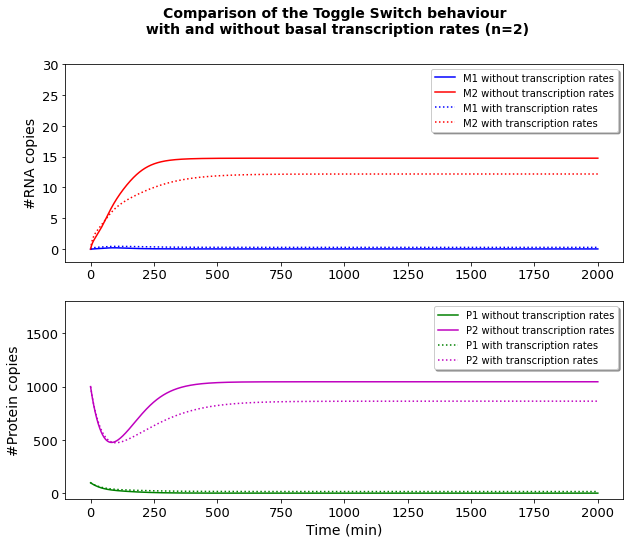

In [4]:
# combine two figures
fig = plt.figure(figsize=(10,8))
fig.suptitle('Comparison of the Toggle Switch behaviour\n with and without basal transcription rates (n=2)', 
              fontsize=14, fontweight='bold')

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

#plot results without basal transcription rates
ax1.plot(t_obs, M1_obs, 'b-',label='M1 without transcription rates')
ax1.plot(t_obs, M2_obs, 'r-',label='M2 without transcription rates')
ax2.plot(t_obs, P1_obs, 'g-',label='P1 without transcription rates')
ax2.plot(t_obs, P2_obs, 'm-',label='P2 without transcription rates')

#plot results with basal transcription rates
ax1.plot(t_obs, M1_t_obs, 'b:',label='M1 with transcription rates')
ax1.plot(t_obs, M2_t_obs, 'r:',label='M2 with transcription rates')
ax2.plot(t_obs, P1_t_obs, 'g:',label='P1 with transcription rates')
ax2.plot(t_obs, P2_t_obs, 'm:',label='P2 with transcription rates')

# adjust axis 
ax1.set_ylim(-2,30)
ax2.set_ylim(-50,1800)
ax1.set_ylabel("#RNA copies")
ax2.set_ylabel("#Protein copies")
ax2.set_xlabel("Time (min)")

ax1.xaxis.label.set_size(14)
ax1.yaxis.label.set_size(14)
ax2.xaxis.label.set_size(14)
ax2.yaxis.label.set_size(14)
ax1.xaxis.set_tick_params(labelsize=13)
ax1.yaxis.set_tick_params(labelsize=13)
ax2.xaxis.set_tick_params(labelsize=13)
ax2.yaxis.set_tick_params(labelsize=13)

ax1.legend(loc = 'upper right', prop={'size': 10}, shadow=True)
ax2.legend(loc = 'upper right', prop={'size': 10}, shadow=True)

#save figure
plt.savefig('fig15.png');

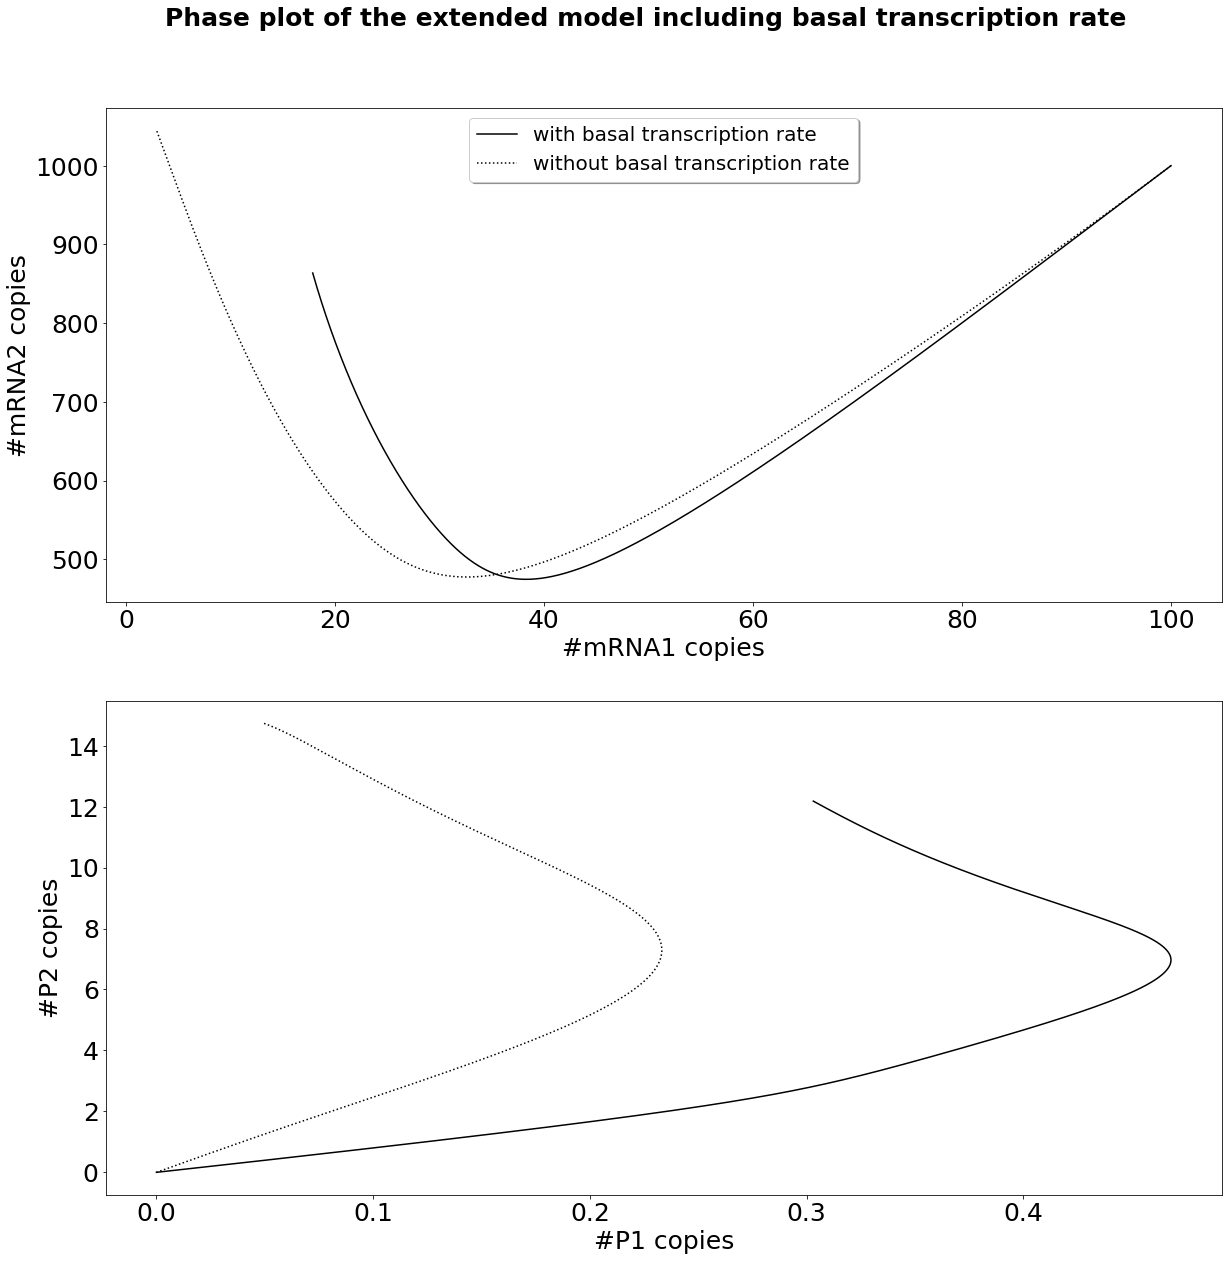

In [12]:
# Phase plot

fig = plt.figure(figsize=(20,20))
fig.suptitle('Phase plot of the extended model including basal transcription rate', fontsize=25, fontweight='bold', y=0.95)
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax2.plot(M1_t_obs, M2_t_obs, 'k-')
ax1.plot(P1_t_obs, P2_t_obs, 'k-', label = 'with basal transcription rate')
ax2.plot(M1_obs, M2_obs,'k:')
ax1.plot(P1_obs, P2_obs,'k:', label = 'without basal transcription rate')

ax1.legend(loc = 'upper center', prop={'size': 20}, shadow=True)

ax1.set_xlabel('#mRNA1 copies')
ax1.set_ylabel('#mRNA2 copies')
ax2.set_xlabel('#P1 copies')
ax2.set_ylabel('#P2 copies')

ax1.xaxis.label.set_size(25)
ax1.yaxis.label.set_size(25)
ax1.xaxis.set_tick_params(labelsize=25)
ax1.yaxis.set_tick_params(labelsize=25)
ax2.xaxis.label.set_size(25)
ax2.yaxis.label.set_size(25)
ax2.xaxis.set_tick_params(labelsize=25)
ax2.yaxis.set_tick_params(labelsize=25)

plt.savefig('Phaseplot_extension.png');